# Predictive Modelling Practice

## Adult Income dataset


<img src="data/images/adults.png" style="width:700px;">

- Let's use our previous dataset __Adults__
- This is the Classification example that we are faimilar with: predict if an adult's salary is <=50K or > 50K
- Interesting fact: this dataset was extracted from the 1994 Census database ¯\_(ツ)_/¯

## Adults Income Dataset (reminder)

- **age**: continuous.
- **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt**: continuous.
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num**: continuous.
- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex**: Female, Male.
- **capital-gain**: continuous.
- **capital-loss**: continuous.
- **hours-per-week**: continuous.
- **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- **income**: `>50K`, `<=50K`

__Classification:__ Prediction task is to determine whether a person makes over 50K a year.

In [1]:
# importing libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import statsmodels
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

## Recap: 

<div class="alert alert-block alert-info">
<b>We need to repeat some pre-processing steps for our dataset in order to start modelling. We are going to sipmplify and even skip some steps that we did previously, however, let's do the following: </b> 
</div>

* check for and drop meaningless variables
* explore our data - are there any variables we should remove?
* one-hot encoding of variables
* build dummy variables from features we have already
* remove hard to interpret variables

In [4]:
# Upload the data 
df_raw = pd.read_csv("data/adult.csv", index_col=[0])

# Drop meaningless variables
df_raw = df_raw.drop(['fnlwgt'], axis=1)

df_raw.head(10)

,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
age,,,,,,,,,,,,,
90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
74,State-gov,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
68,Federal-gov,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K


In [5]:
# Majority countries are of United-States occurrences, let's drop it
df_raw = df_raw.drop(['native.country'], axis=1)

# One-hot encode categorical variables  - we need numbers only, remmeber?
one_hot_df = pd.get_dummies(df_raw, drop_first=True)


,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_>50K
age,,,,,,,,,,,,,,,,,,,,,
90,9,0,4356,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
82,9,0,4356,18,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
66,10,0,4356,40,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
54,4,0,3900,40,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
41,10,0,3900,40,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
34,9,0,3770,45,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
38,6,0,3770,40,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
74,16,0,3683,20,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
68,9,0,3683,40,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
# check out dataset
one_hot_df.head(20)

,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_>50K
age,,,,,,,,,,,,,,,,,,,,,
90,9,0,4356,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
82,9,0,4356,18,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
66,10,0,4356,40,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
54,4,0,3900,40,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
41,10,0,3900,40,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
34,9,0,3770,45,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
38,6,0,3770,40,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
74,16,0,3683,20,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
68,9,0,3683,40,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# Build dummy variable for working vs not working ('Without-pay')
for col in one_hot_df.columns:
    if 'workclass_' in col and ' Without-pay' not in col:
        one_hot_df = one_hot_df.drop([col], axis=1)

one_hot_df.columns.values

array(['education.num', 'capital.gain', 'capital.loss', 'hours.per.week',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital.status_Married-AF-spouse',
       'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent',
       'marital.status_Never-married', 'marital.status_Separated',
       'marital.status_Widowed', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty'

In [9]:
# Remove education.num as it is difficult to interpret (and we have other columns for education levels)

one_hot_df = one_hot_df.drop(['education.num'], axis=1)

## PREDICTIVE ANALYSIS

The predictive analysis follows a descriptive stage, once we have:
 - cleaned the data
 - created a few derived variables
 - have a better understanding of the data. 
 
 
 <div class="alert alert-block alert-info">
<b>Its aim is to build a performing predictive model and to identify the main explanatory variables. 
This is an iterative process as a variety of modelling approaches are usually tested and new features are created.</b> 
</div>

__OBJECTIVE:__ 
- The primary goal is to accurately predict whether an adult is going to make more than 50K a year and understand the drivers explaining such an income.

In [12]:
# EXPLORING

# We can look at the proportion of positive and negative labels i.e. 
# the number of rows with income > 50K vs the number of rows where it is not.


"""
We have a reasonable amount of data in each class which is good. 
Sometimes we can have imbalanced classes, where the size of one class is much smaller than the size of the other class. 
In this case, we may need some additional methods to address this. 
CHECK https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/ 
"""

one_hot_df['income_>50K'].value_counts()/len(one_hot_df['income_>50K'])




0    0.75919
1    0.24081
Name: income_>50K, dtype: float64

In [16]:
# Remove the target variable from the dataset

target = one_hot_df['income_>50K']
one_hot_df_indep = one_hot_df.drop('income_>50K', axis=1)

print(target)

age
90    0
82    0
66    0
54    0
41    0
     ..
22    0
27    0
40    1
58    0
22    0
Name: income_>50K, Length: 32561, dtype: uint8


In [17]:
# Splitting the data into training and testing sets
# Reminder a frequent test set size is 20%-30% of the original dataset

X = one_hot_df_indep.values
X_train, X_test, y_train, y_test  = train_test_split(X, target, test_size = 0.2)

## DECISION TREE

<img src="data/images/tree.png">

- A decision tree can be perceived as a set of rules which enable to better describe and predict a given phenomenon, e.g., here, a salary `>50K` or `<= 50K`. 

- As its name indicates, a tree is composed of branches (which link the nodes to one another or to the final leaves), nodes (in the middle of the tree) and leaves (higher end of the tree).


<div class="alert alert-block alert-info">
In our case, the tree splits at each node, on a **rule/condition** (explanatory variable and a set of values - e.g., **age > 38**) according to a criterion, to better separate `>50K` vs `<= 50K` populations.
</div>

In [18]:
# Decision tree

# Initiate your Decision Tree Classifier model
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

clf = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=20, 
                             min_samples_leaf=10, max_features=None)

# Fit your Decision Tree model to your train model
clf.fit(X_train, y_train)

# Predict labels on your Test set of independent variables
pred_clf = clf.predict(X_test)

# Predict probabilities on your Test set of independent variables
proba_clf = clf.predict_proba(X_test)

In [20]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred_clf))

# interpretation - we guess our labels corrctly 85% o the time


Accuracy: 0.8516812528788577


## CONFUSION MATRIX

<div class="alert alert-block alert-info">
<b>It is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.</b> 
</div>

<img src="data/images/confusion.jpg">

#### CONFSION MATRIX EXAMPLE

__True Positive:__
- Interpretation: You predicted positive and it’s true.
- You predicted that a woman is pregnant and she actually is.

__True Negative:__
- Interpretation: You predicted negative and it’s true.
- You predicted that a man is not pregnant and he actually is not.

__False Positive: (Type 1 Error)__
- Interpretation: You predicted positive and it’s false.
- You predicted that a man is pregnant but he actually is not.

__False Negative: (Type 2 Error)__
- Interpretation: You predicted negative and it’s false.
- You predicted that a woman is not pregnant but she actually is.

In [21]:
#Let's take a look at the confusion matrix, to see where our classifier is making mistakes

print(metrics.confusion_matrix(y_test, pred_clf))

[[4674  235]
 [ 731  873]]


##  ROC CURVE

>__ROC curve (receiver operating characteristic curve)__ is a graph showing the performance of a classification model at all >classification thresholds. This curve plots two parameters:
> - True Positive Rate
> - False Positive Rate

## AUC

>__AUC stands for "Area under the ROC Curve."__ 
> AUC measures the entire two-dimensional area underneath the entire ROC curve

__REFERENCE__: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

In [23]:
# More evaluation metrics
print(metrics.classification_report(y_test, pred_clf))

auc = metrics.roc_auc_score(y_test, proba_clf[:,1])
print("AUC: ", auc)

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      4909
           1       0.79      0.54      0.64      1604

    accuracy                           0.85      6513
   macro avg       0.83      0.75      0.78      6513
weighted avg       0.85      0.85      0.84      6513

AUC:  0.8925255739242238


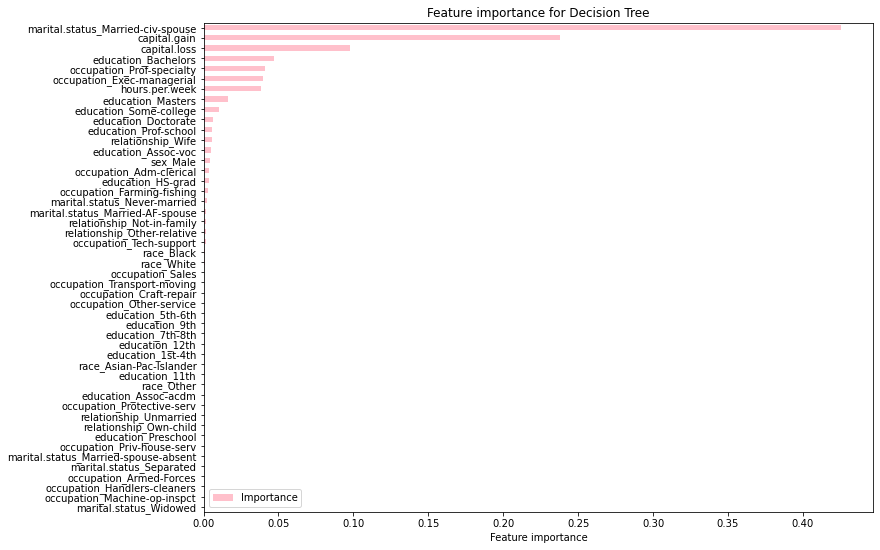

In [25]:
# FEATURE IMPORTANCE

"""
A machine learning model is only as good as the features that it is trained on.
Let's plot a graph to visualise the key features that contribute to the model predicitons.
"""
features_log = pd.DataFrame(clf.feature_importances_, index = one_hot_df_indep.columns.tolist(), 
                            columns = ['Importance'])
features_log = features_log.sort_values(by='Importance', ascending=True)

features_log.plot(kind='barh', figsize=(12,9), color = 'pink')
plt.xlabel('Feature importance')
plt.title('Feature importance for Decision Tree')
plt.show()